<a href="https://colab.research.google.com/github/SolaZh/Thesis_Usability_test/blob/main/thesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving usability_data.csv to usability_data (5).csv


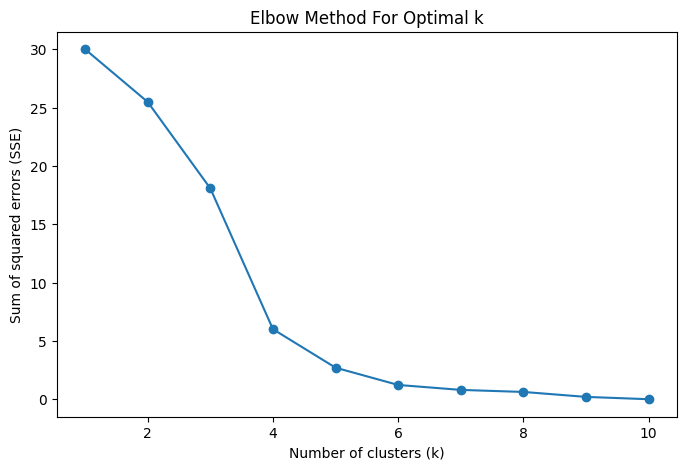

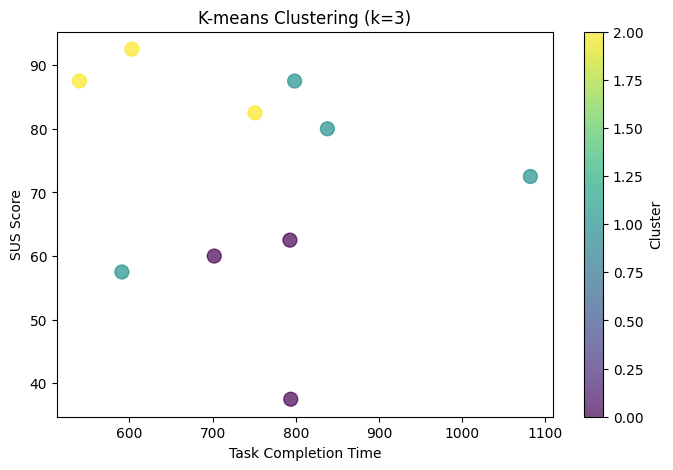

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# If running in Google Colab, you can use the file uploader to import your CSV:
from google.colab import files
uploaded = files.upload()

# Load your data into a pandas DataFrame
# Replace 'usability_data.csv' with your filename
df = pd.read_csv('usability_data.csv')

# Display the first few rows of the DataFrame to confirm successful import
df.head()

# Select the variables you want to use for clustering.
# For example, let's assume you want to use task completion time, SUS score, and error count.
features = df[['completion_time', 'SUS', 'lostness']]

# Standardize the features (important when using clustering algorithms)
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Determine the optimal number of clusters using the Elbow Method
sse = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    sse.append(kmeans.inertia_)  # Inertia: Sum of squared distances to closest cluster center

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, sse, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of squared errors (SSE)')
plt.title('Elbow Method For Optimal k')
plt.show()

# Based on the elbow curve, choose the optimal k (for example, k=3)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(features_scaled)

# Add the cluster assignments to the original DataFrame
df['cluster'] = clusters

# Display the first few rows of the updated DataFrame
df.head()

# Visualize the clusters
# For simplicity, we can plot a scatter plot using two dimensions, e.g., SUS_score vs. completion_time.
plt.figure(figsize=(8, 5))
plt.scatter(df['completion_time'], df['SUS'], c=df['cluster'], cmap='viridis', s=100, alpha=0.7)
plt.xlabel('Task Completion Time')
plt.ylabel('SUS Score')
plt.title(f'K-means Clustering (k={optimal_k})')
plt.colorbar(label='Cluster')
plt.show()


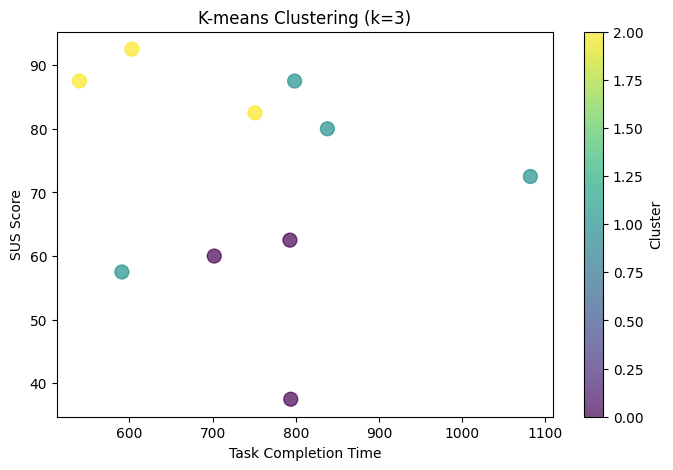

In [ ]:
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(features_scaled)

# Add the cluster assignments to the original DataFrame
df['cluster'] = clusters

# Display the first few rows of the updated DataFrame
df.head()

# Visualize the clusters
# For simplicity, we can plot a scatter plot using two dimensions, e.g., SUS_score vs. completion_time.
plt.figure(figsize=(8, 5))
plt.scatter(df['completion_time'], df['SUS'], c=df['cluster'], cmap='viridis', s=100, alpha=0.7)
plt.xlabel('Task Completion Time')
plt.ylabel('SUS Score')
plt.title(f'K-means Clustering (k={optimal_k})')
plt.colorbar(label='Cluster')
plt.show()

In [ ]:
optimal_k = 3

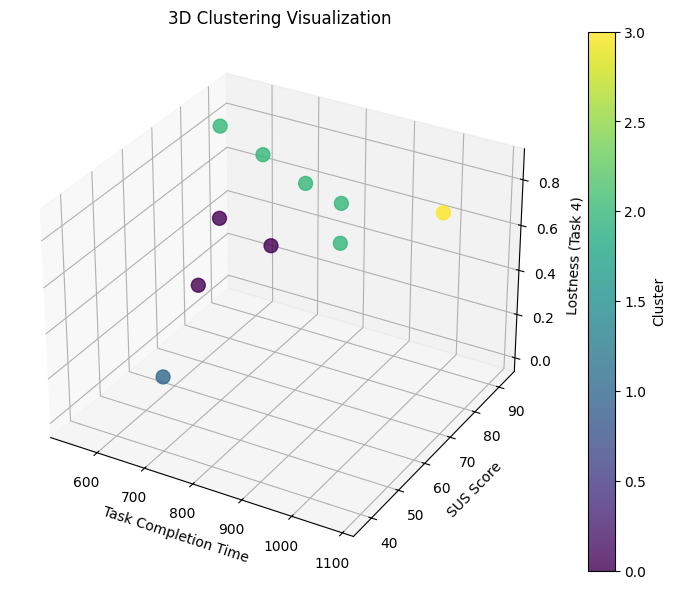

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df['completion_time'], df['SUS'], df['lostness'],
                     c=df['cluster'], cmap='viridis', s=100, alpha=0.8)
ax.set_xlabel('Task Completion Time')
ax.set_ylabel('SUS Score')
ax.set_zlabel('Lostness (Task 4)')
ax.set_title('3D Clustering Visualization')
fig.colorbar(scatter, ax=ax, label='Cluster')
plt.show()

In [ ]:
feedback1 = [
    "skipped on relationship stress. can't see where would find good reviews. Easy for specialty, but lots of option. Maybe they can be categorized - potentially broad category for stress for example. ",
    "Seeing different kinds of stress, just assumed work stress. Not really seeing anything for reviews. Not sure if availablity is turned on or not. Clicked on the filter button after. Thinks the dropdown list makes sense. Don't have to do any unreasonable scrolling. Pretty usable. ",
    "Different types of stress and is confusing. Missed the filter the first time around so it might even be of value to filter first and then see the list. The long list as its own page as a precursor would then be better. ",
    "Had a really hard time finding where the filters are located on the screen. Trying to browse through the profiles by reading the blurb. Time consuming and impractical. Would find more of the tags alongside blurbs could be useful. Overall sizing of the filters seems really small. Like the ability to check off multiple filters. Would be nice however to have search ability on the filter. Instead of having an alphabetical order, labelled sub section might have been better.",
    "Clicked on filter which highlighted the filters available and after reading through them, clicked on specialty and selected the diferent stresses available. If reviews are not available, I would expect the therapists to be arranged in order of ranking by review. Potentially categorizing the specialties would be great.",
    "The placement of the filters is intuitive. Not used to it tho. Clicking the initial filter button would have expanded the options available under each of the filter categories available. Intuitive enough. The screen was scrolled up and the filter list was not scrollable. Only the whole website is scrollable, thus completely missed the other types of stress in the list. ",
    "Clicked on specialty straightaway. The way the list is formatted could be overwhelming. Having the different versions of stress is useful tho. Clicked on therapy type and taken aback by how long the list is. Selected Cognitive behavioral, psychoanalytic, and family systems but really confused as a whole on selecting option here. Would look for pagination, sorting with context from previous entries and narrow options specific to client. If selection of specialty is done, therapy type should have filtered options remaining."
    "Clicked on the filter first and then navigated onto the specialty buton. Clicked on anxiety, student life. Then selected the other filters in according to her needs. Really perplexed at the number of options and overwhelmed with therapy types. Would have appreciated definitions as not aware for all of them. Age should have been order and not alphabetical.",
    "Confused as to how the filters are available and there are so many options. Would have liked to see a search option. Was not sure whether to look under specialty or therapy type. Appreciated the alphabetical order but stress being the second word in the options did not help.",
]

In [ ]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('all-MiniLM-L6-v2')  # Lightweight, fast, and solid performance
embeddings = model.encode(feedback1)

In [ ]:
from sklearn.cluster import KMeans

# Your existing code:
model = SentenceTransformer('all-MiniLM-L6-v2')
embeddings = model.encode(feedback1)
kmeans = KMeans(n_clusters=4)
cluster_labels = kmeans.fit_predict(embeddings)

In [ ]:
from collections import defaultdict

clustered_feedback = defaultdict(list)
for comment, label in zip(feedback1, cluster_labels):
    clustered_feedback[label].append(comment)

# Now review each cluster's comments
for label, comments in clustered_feedback.items():
    print(f"\n--- Cluster {label} ---")
    for comment in comments:
        print(f"- {comment}")


--- Cluster 3 ---
- skipped on relationship stress. can't see where would find good reviews. Easy for specialty, but lots of option. Maybe they can be categorized - potentially broad category for stress for example. 

--- Cluster 2 ---
- Seeing different kinds of stress, just assumed work stress. Not really seeing anything for reviews. Not sure if availablity is turned on or not. Clicked on the filter button after. Thinks the dropdown list makes sense. Don't have to do any unreasonable scrolling. Pretty usable. 
- Different types of stress and is confusing. Missed the filter the first time around so it might even be of value to filter first and then see the list. The long list as its own page as a precursor would then be better. 

--- Cluster 0 ---
- Had a really hard time finding where the filters are located on the screen. Trying to browse through the profiles by reading the blurb. Time consuming and impractical. Would find more of the tags alongside blurbs could be useful. Overall 

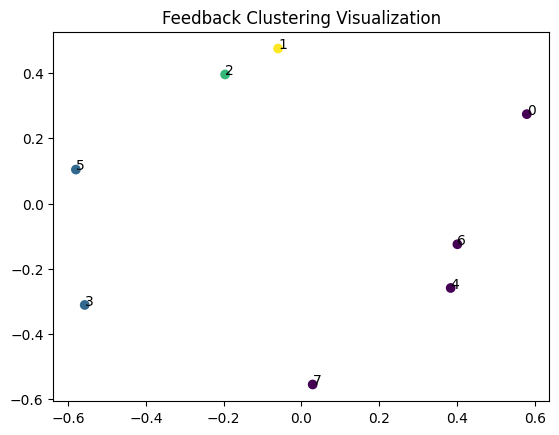

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
reduced = pca.fit_transform(embeddings)

plt.scatter(reduced[:, 0], reduced[:, 1], c=clusters)
for i, txt in enumerate(feedback1):
    plt.annotate(i, (reduced[i, 0], reduced[i, 1]))
plt.title("Feedback Clustering Visualization")
plt.show()